In [ ]:
"""
Purpose: To test the new v5 rules that have the following
changes

1) Better Width and Double Back Implementation


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-05-27 15:47:06,224 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-27 15:47:06,227 - settings - Setting database.user to celiib
INFO - 2021-05-27 15:47:06,228 - settings - Setting database.password to newceliipass
INFO - 2021-05-27 15:47:06,232 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-05-27 15:47:06,233 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-27 15:47:06,248 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-05-27 15:47:06,766 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-27 15:47:06,770 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-27 15:47:06,771 - settings - Setting database.user to celiib
INFO - 2021-05-27 15:47:06,772 - settings - Setting database.password to newceliipass
INFO - 2021-05-27 15:47:06,773 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-27 15:47:06,774 - settings - Setting database.user to celiib
INFO - 2021-05-27 15:47:06,775 - settings - Setting database.password to newceliipass
INFO - 2021-05-27 15:47:06,779 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-27 15:47:07,333 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-27 15:47:10,256 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-27 15:47:10,257 - settings - Setting database.user to celiib
INFO - 2021-05-27 15:47:10,258 - settings - Setting database.password to newceliipass
INFO - 2021-05-27 15:47:10,263 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-27 15:47:10,903 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading Neurons to Test with

In [69]:
curr_table = minnie.AutoProofreadValidationScore5() * minnie.AutoProofreadValidationSegmentMap4()
curr_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5281,7,39,3,0.9926691729323308,0.9994322482967449,0.9960392304790645,365.54,864691135585319036,True,True,full,1,0,0,0,
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3410,3859,0,0.00025906735751295336,1.0,0.000518000518000518,328.9,864691135538120050,True,True,full,2,0,0,0,
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,126.79,864691135564655959,True,True,full,1,0,0,0,
88.00,230236,864691135609687047,0.08,0,=BLOB=,1560.5711064168272,=BLOB=,=BLOB=,34,550,11,16,0.7555555555555555,0.68,0.7157894736842104,1961,22,1,1,0.9994903160040775,0.9994903160040775,0.9994903160040775,403.91,864691135748568361,True,True,full,1,0,0,0,
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,975,0,5,nan,0.0,nan,2750,2329,7,48,0.9974610083424011,0.9828448892065761,0.99009900990099,429.31,864691135758569550,True,True,full,2,0,2,0,
88.00,258307,864691135293126156,0.08,0,=BLOB=,1074.2131095105929,=BLOB=,=BLOB=,43,340,12,27,0.7818181818181819,0.6142857142857143,0.6880000000000002,2984,7,25,19,0.9916915918909937,0.9936729936729937,0.9926813040585496,291.23,864691136194042326,True,True,full,1,0,0,0,
88.00,262773,864691136023889209,0.08,0,=BLOB=,191.70683649485437,=BLOB=,=BLOB=,9,48,2,0,0.8181818181818182,1.0,0.9,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,88.75,864691135233108569,True,True,full,1,0,0,0,
88.00,264870,864691136951664863,0.08,0,=BLOB=,1021.2379299332463,=BLOB=,=BLOB=,31,422,2,1,0.9393939393939394,0.96875,0.9538461538461539,2008,25,4,33,0.9980119284294234,0.9838314551690348,0.9908709597828769,253.79,864691135740225387,True,True,full,1,0,0,0,
88.00,269247,864691135584074360,0.08,0,=BLOB=,2323.8059162243367,=BLOB=,=BLOB=,237,36,4,7,0.983402489626556,0.9713114754098361,0.9773195876288661,806,0,7,65,0.991389913899139,0.9253731343283582,0.9572446555819477,420.94,864691136105498585,True,True,full,1,0,0,0,
88.00,269380,864691135974639471,0.08,0,=BLOB=,437.8471079089947,=BLOB=,=BLOB=,27,257,4,11,0.8709677419354839,0.7105263157894737,0.782608695652174,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,249.06,864691134988386682,True,True,full,1,0,0,0,


In [71]:
curr_table & "pre_precision<0.5" & "pre_fp > 20"

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,301095,864691135446675028,0.08,0,=BLOB=,1055.1068220195411,=BLOB=,=BLOB=,11,374,27,4,0.2894736842105263,0.7333333333333333,0.4150943396226416,3323,8,6,26,0.9981976569540403,0.992236488504031,0.9952081461515423,373.81,864691135212632448,True,True,full,1,0,0,0,
88.00,553283,864691135181923074,0.08,0,=BLOB=,816.0229998200101,=BLOB=,=BLOB=,13,104,22,3,0.37142857142857144,0.8125,0.5098039215686275,4188,1,0,0,1.0,1.0,1.0,189.33,864691135716725908,True,True,partial,1,0,0,0,bendy axon ais trajectory
88.00,582444,864691135571017453,0.08,0,=BLOB=,1235.6839364063626,=BLOB=,=BLOB=,19,89,36,1,0.34545454545454546,0.95,0.5066666666666667,6500,1,1,2,0.9998461775111521,0.9996924023377423,0.999769284011382,389.93,864691136143393332,True,True,partial,1,0,0,0,


In [79]:
curr_segment_id = 864691135462735678 #look at high branching degree error later
curr_segment_id = 864691135012541942 # fixed the dendrite portion
curr_segment_id = 864691135058565275 # fixed the axon width jump errors
curr_segment_id = 864691135212690816 #fixed
curr_segment_id = 864691135939655846 #fixed incorrect parameter seetting
curr_segment_id = 864691136194103510
# ------ checking on the updated version 5 ----------#
curr_segment_id = 864691135865773189
search_key = dict(old_segment_id=curr_segment_id)
(curr_table & search_key)

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes


In [80]:
split_index = 0
segment_id = curr_segment_id
decomp_path = (minnie.DecompositionAxon() & dict(segment_id=segment_id,
                                  split_index = split_index,
                                 )).fetch1("decomposition")
neuron_obj = du.filepath_to_neuron_obj(decomp_path)

Decompressing Neuron in minimal output mode...please wait


In [96]:
not_stitched_pieces = nru.non_soma_touching_meshes_not_stitched(neuron_obj)

In [98]:
nviz.plot_objects(neuron_obj.mesh,
                  meshes=not_stitched_pieces,
                  meshes_colors="red",
                  mesh_alpha=1)

In [ ]:
nviz.plot_objects

In [95]:
neuron_obj.non_soma_touching_meshes

[<trimesh.Trimesh(vertices.shape=(11311, 3), faces.shape=(22396, 3))>,
 <trimesh.Trimesh(vertices.shape=(10439, 3), faces.shape=(20797, 3))>,
 <trimesh.Trimesh(vertices.shape=(10311, 3), faces.shape=(20439, 3))>,
 <trimesh.Trimesh(vertices.shape=(9619, 3), faces.shape=(19147, 3))>,
 <trimesh.Trimesh(vertices.shape=(9488, 3), faces.shape=(18870, 3))>,
 <trimesh.Trimesh(vertices.shape=(8175, 3), faces.shape=(16316, 3))>,
 <trimesh.Trimesh(vertices.shape=(8031, 3), faces.shape=(15947, 3))>,
 <trimesh.Trimesh(vertices.shape=(5853, 3), faces.shape=(11555, 3))>,
 <trimesh.Trimesh(vertices.shape=(5357, 3), faces.shape=(10656, 3))>,
 <trimesh.Trimesh(vertices.shape=(5353, 3), faces.shape=(10694, 3))>,
 <trimesh.Trimesh(vertices.shape=(5280, 3), faces.shape=(10473, 3))>,
 <trimesh.Trimesh(vertices.shape=(5017, 3), faces.shape=(10014, 3))>,
 <trimesh.Trimesh(vertices.shape=(4382, 3), faces.shape=(8753, 3))>,
 <trimesh.Trimesh(vertices.shape=(4344, 3), faces.shape=(8659, 3))>,
 <trimesh.Trimesh(v

In [130]:
import axon_utils as au
neuron_obj_axon = au.complete_axon_processing(neuron_obj)

endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = [17181]
Skeleton paths distances = [24930.07858738]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [147.62416683]
base_final_widths = [190.71999881 191.59622564 227.55154207]
overall_ais_width = 190.71999880599452
ais_width = 203.28925550568695
endnodes_to_test = [0]
Skeleton paths distances = [2459.1975387]
Filtered indexes = []
len(filtered_skeletons) = 1
sk_angles = [129.12507118]
base_final_widths = [117.78919948 438.43601345]
overall_ais_width = 278.1126064632469
ais_width = 278.1126064632469
endnodes_to_test = [0]
Skeleton paths distances = [2667.79972703]
Filtered indexes = []
len(filtered_skeletons) = 1
sk_angles = [78.5900486]
endnodes_to_test = [0]
Skeleton paths distances = [4157.27246412]
Filtered indexes = []
len(filtered_skeletons) = 1
sk_angles = [112.43574784]
base_final_widths = [144.08153957 552.41597278]
overall_ais_width = 348.24875617643903
ais_width = 348.24875617643903
endnodes_to_test

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/110912 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.918610095977783
connecting at the root
branches_touching_root = [108]
combining close nodes
combine_threshold = 1300
length of Graph = 30329
After combining close endpoints max(kept_branches_idx) = 108, len(kept_branches_idx) = 103
empty_indices % = 0.0
 conflict_indices % = 0.012613419050331611


  0%|          | 0/45 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/103 [00:00<?, ?it/s]

Decomposing first pass: 16.889336109161377
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.0002605915069580078
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0002028942108154297
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.000782012939453125
sbv[0].reshape(-1,3) = [[1170227.   686364.   890919.7]]
closest_sk_pt_coord BEFORE = [1169783.87695949  686175.97523819  890329.79268855]
current_skeleton.shape = (24, 2, 3)
node_for_stitch = 6: [1169783.87695949  686175.97523819  890329.79268855]
node_for_stitch AFTER = 6: [1169783.87695949  686175.97523819  890329.79268855]
possible_node_loc = [0 5]
possible_node_loc AFTER = [0 5]
curr_shortest_path = [6, 5.0]
Current stitch point was not a branch or endpoint, shortest_path_len

  0%|          | 0/103 [00:00<?, ?it/s]

221204 221205
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/103 [00:00<?, ?it/s]

Limb Correspondence before stitching = 103
******************************
Filtering away non soma floating pieces near the soma
Before filter # of pieces = 97
AFTER filter # of pieces = 91
******************************
meshes_to_stitch = [<trimesh.Trimesh(vertices.shape=(10311, 3), faces.shape=(20439, 3))>, <trimesh.Trimesh(vertices.shape=(8175, 3), faces.shape=(16316, 3))>, <trimesh.Trimesh(vertices.shape=(8031, 3), faces.shape=(15947, 3))>, <trimesh.Trimesh(vertices.shape=(7697, 3), faces.shape=(15403, 3))>, <trimesh.Trimesh(vertices.shape=(2579, 3), faces.shape=(5145, 3))>, <trimesh.Trimesh(vertices.shape=(1932, 3), faces.shape=(3860, 3))>, <trimesh.Trimesh(vertices.shape=(1376, 3), faces.shape=(2751, 3))>, <trimesh.Trimesh(vertices.shape=(831, 3), faces.shape=(1662, 3))>, <trimesh.Trimesh(vertices.shape=(630, 3), faces.shape=(1260, 3))>, <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(556, 3))>, <trimesh.Trimesh(vertices.shape=(10439, 3), faces.shape=(20797, 3))>, <trimesh.

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06432246998284734
 conflict_indices % = 0.002327860818426856


  0%|          | 0/18 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 133


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5085264538696983
 conflict_indices % = 0.0


  0%|          | 0/7 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 212


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.32128960533629797
 conflict_indices % = 6.948304613674263e-05


  0%|          | 0/27 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4914756025867137
 conflict_indices % = 0.0


  0%|          | 0/28 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 115


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5650623885918004
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 259


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.22810590631364563
 conflict_indices % = 0.10386965376782077


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 268


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.15938714841070203
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 235
The closest float distance was 23081.08569243381 which was greater than the maximum stitch distance 13000
 --> so ending the floating mesh stitch processs
Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/main_limb_skeletons.pbz2
File size is 2.042868 MB
Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/floating_limbs_skeleton_endpoints.pbz2
File size is 0.004676 MB
Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/floating_piece_min_distance_all_main_limbs.pbz2
File size is 0.002241 MB
Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/limb_correspondence_cp.pbz2
File size is 17.801868 MB


Exception: Done stitching

In [131]:
debug

> /meshAfterParty/meshAfterParty/preprocessing_vp2.py(598)attach_floating_pieces_to_limb_correspondence()
    596             su.compressed_pickle(floating_piece_min_distance_all_main_limbs,"floating_piece_min_distance_all_main_limbs")
    597             su.compressed_pickle(limb_correspondence_cp,'limb_correspondence_cp')
--> 598             raise Exception("Done stitching")
    599 
    600             return limb_correspondence_cp

ipdb> su.compressed_pickle(floating_limbs_skeleton,"floating_limbs_skeleton")
Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/floating_limbs_skeleton.pbz2
File size is 1.194235 MB
ipdb> u
> /meshAfterParty/meshAfterParty/preprocessing_vp2.py(4300)high_fidelity_axon_decomposition()
   4298                         excluded_node_coordinates = np.array(starting_coordinate).reshape(-1,3),
   4299                         floating_piece_face_threshold = floating_piece_face_threshold,
-> 4300                         **preproc

In [ ]:
# to save off
excluded_meshes = tu.check_meshes_inside_mesh_bbox(neuron_obj["S0"].mesh,
                                floating_meshes_non_incorporated,
                                 return_inside=True,
                                bbox_multiply_ratio=soma_bbox_multiplier)

floating_limbs_skeleton

In [133]:
su.compressed_pickle(neuron_obj_axon.axon_skeleton,"processed_axon_skeleton")

Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_5/processed_axon_skeleton.pbz2
File size is 1.21192 MB


In [111]:
import system_utils as su
main_limb_skeletons = su.decompress_pickle("main_limb_skeletons")
floating_limbs_skeleton_endpoints = su.decompress_pickle("floating_limbs_skeleton_endpoints")
floating_piece_min_distance_all_main_limbs = su.decompress_pickle("floating_piece_min_distance_all_main_limbs")
limb_correspondence_cp = su.decompress_pickle("limb_correspondence_cp")

In [112]:
nviz.plot_limb_correspondence(limb_correspondence_cp)

In [116]:
nviz.plot_objects(main_skeleton=neuron_obj_axon.axon_skeleton,
                  meshes=neuron_obj.non_soma_touching_meshes)

In [121]:
nviz.plot_objects(skeletons=skeletons,
                  main_mesh = tu.combine_meshes(meshes),
                  main_mesh_color="red",
                  meshes=neuron_obj.non_soma_touching_meshes,
                 meshes_colors="green")

In [126]:
main_limb_skeletons

[array([[[1004252.        ,  887691.        ,  772915.5       ],
         [1004318.50628955,  887616.5695568 ,  772909.41538202]],
 
        [[1004318.50628955,  887616.5695568 ,  772909.41538202],
         [1004391.58615697,  887550.38567954,  772917.32698292]],
 
        [[1004391.58615697,  887550.38567954,  772917.32698292],
         [1004469.29868522,  887490.01348409,  772935.1022739 ]],
 
        ...,
 
        [[1273931.08796663,  518213.7361001 , 1107943.82406673],
         [1273935.96263353,  518141.72321519, 1107879.27450701]],
 
        [[1273935.79913359,  518471.32246398, 1108341.60259922],
         [1273936.97772116,  518405.86632697, 1108267.84404814]],
 
        [[1271193.        ,  516453.        , 1102458.        ],
         [1270914.        ,  516305.5       , 1102194.        ]]])]

In [127]:
nviz.plot_objects(skeletons=main_limb_skeletons,
                  main_mesh = tu.combine_meshes(meshes),
                  main_mesh_color="red",
                  meshes=neuron_obj.non_soma_touching_meshes,
                 meshes_colors="green",
                 scatters=floating_limbs_skeleton_endpoints,
                 scatter_size=0.3,
                 scatters_colors="red")

In [115]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_cp)
nviz.plot_objects(neuron_obj.mesh,
                 meshes=meshes,
                 meshes_colors="random",
                 skeletons=skeletons,
                 skeletons_colors="random")

In [113]:
nviz.plot_objects(meshes=Out[108],
                  meshes_colors="red",
                  mesh_alpha=1,
                 append_figure=True,
                 show_at_end=False)

In [108]:
nru.non_soma_touching_meshes_not_stitched(neuron_obj)

array([<trimesh.Trimesh(vertices.shape=(10439, 3), faces.shape=(20797, 3))>,
       <trimesh.Trimesh(vertices.shape=(9488, 3), faces.shape=(18870, 3))>,
       <trimesh.Trimesh(vertices.shape=(5357, 3), faces.shape=(10656, 3))>,
       <trimesh.Trimesh(vertices.shape=(5353, 3), faces.shape=(10694, 3))>,
       <trimesh.Trimesh(vertices.shape=(5280, 3), faces.shape=(10473, 3))>,
       <trimesh.Trimesh(vertices.shape=(4344, 3), faces.shape=(8659, 3))>,
       <trimesh.Trimesh(vertices.shape=(3824, 3), faces.shape=(7635, 3))>,
       <trimesh.Trimesh(vertices.shape=(3487, 3), faces.shape=(6933, 3))>,
       <trimesh.Trimesh(vertices.shape=(3254, 3), faces.shape=(6477, 3))>,
       <trimesh.Trimesh(vertices.shape=(3175, 3), faces.shape=(6335, 3))>,
       <trimesh.Trimesh(vertices.shape=(3149, 3), faces.shape=(6237, 3))>,
       <trimesh.Trimesh(vertices.shape=(3066, 3), faces.shape=(6085, 3))>,
       <trimesh.Trimesh(vertices.shape=(2846, 3), faces.shape=(5671, 3))>,
       <trimesh.Tri

In [102]:
nviz.visualize_neuron(neuron_obj_axon,
                     limb_branch_dict=dict(L2="all"),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [88]:
orig_mesh = du.fetch_segment_id_mesh(neuron_obj.segment_id)

In [90]:
nviz.plot_objects(orig_mesh,
                 meshes=neuron_obj.non_soma_touching_meshes,
                 meshes_colors="red")

In [86]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(L2="all"),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [84]:
nviz.plot_axon(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [83]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Doing the proofreading with version 5

In [82]:
import proofreading_utils as pru
import validation_utils as vu
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                filter_list = pru.v5_exc_filters(),
                                plot_limb_branch_filter_with_disconnect_effect = True,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = 560530,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)


*****Using v5 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh


KeyboardInterrupt: 

In [ ]:
presyn_scores_dict = vu.scores_presyn(return_validation_df_revised)
postsyn_scores_dict = vu.scores_postsyn(return_validation_df_revised)

cat = vu.synapse_validation_df_to_category_counts(return_validation_df_revised,
                                    print_postsyn=True,
                                    print_presyn=True)

print(presyn_scores_dict,postsyn_scores_dict)

In [ ]:
(curr_table & search_key).fetch("pre_precision","pre_recall","pre_f1",
                               "post_precision","post_recall","post_f1")

# Plotting the Proofread Neuron

In [ ]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

# The current performance

In [30]:
v4_old_seg_ids = (minnie.AutoProofreadValidationScore4()*minnie.AutoProofreadValidationSegmentMap4()
 & "pre_recall<0.3").fetch("old_segment_id")

In [29]:
v5_old_seg_ids = (minnie.AutoProofreadValidationScore5()*minnie.AutoProofreadValidationSegmentMap4()
 & "pre_recall<0.3").fetch("old_segment_id")

In [31]:
import numpy as np
np.setdiff1d(v5_old_seg_ids,v4_old_seg_ids)

array([864691135012541942, 864691135058565275, 864691135099943968,
       864691135113167769, 864691135212690816, 864691135291760310,
       864691135307114822, 864691135345149087, 864691135345162399,
       864691135348272855, 864691135373686345, 864691135467605132,
       864691135474673984, 864691135564677207, 864691135589907979,
       864691135644632047, 864691135726145172, 864691135732762772,
       864691135785277636, 864691135858702952, 864691135865518469,
       864691135925533454, 864691135939655846, 864691135945461284,
       864691135997475018, 864691136003930314, 864691136050851571,
       864691136143393332, 864691136194042326, 864691136194103510,
       864691136194198504, 864691136201041854, 864691136273691661,
       864691136537220258, 864691136550489250, 864691136618403213,
       864691136766957166])

In [23]:
minnie,_ = du.configure_minnie_vm()
validation_dfs = minnie.AutoProofreadValidationScore5().fetch("validation_df")
validation_dfs = [vu.load_df_val_from_numpy(k) for k in validation_dfs]
validation_dfs

[     synapse_id synapse_type auto_valid synapse_x synapse_y synapse_z  \
 0      76963424       presyn       True    521800    532392    972400   
 1      76963829       presyn       True    523416    531720    972240   
 2      76964110       presyn       True    524512    532600    972680   
 3      78899369       presyn       True    534080    501888    975520   
 4      78899421       presyn       True    534352    501976    975760   
 ...         ...          ...        ...       ...       ...       ...   
 5503  150699013      postsyn      False    691872    345464   1053200   
 5504  150777124      postsyn      False    689128    359320   1044840   
 5505  150777173      postsyn      False    689200    357200   1045920   
 5506  150777246      postsyn      False    689664    363136   1044400   
 5507  150777505      postsyn      False    690968    361904   1044480   
 
      manual_valid category      old_segment_id      new_segment_id  \
 0            True       TP  8646911355

Segment Id = 864691134988385914
Postsyn counts:
TP:472547
TN:121752
FP:4809
FN:67584
Presyn counts:
TP:1828
TN:27109
FP:478
FN:1901


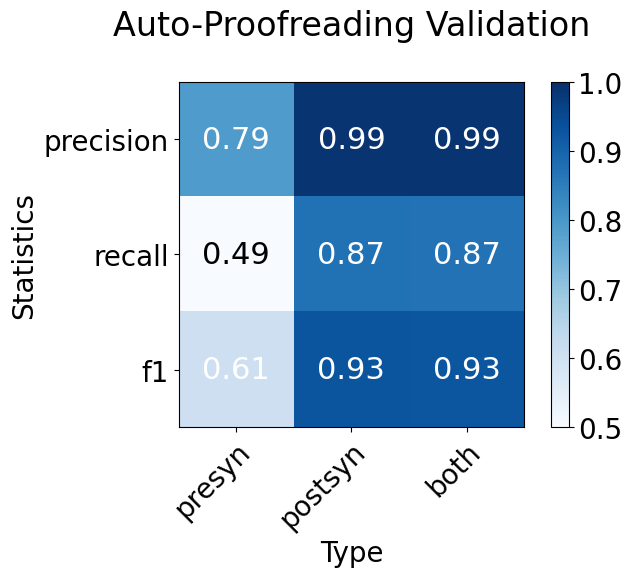

In [24]:
import pandas_utils as pu
total_validation_df = pu.concat(validation_dfs)
total_validation_df
vu.synapse_validation_df_to_score_plot(total_validation_df)

# Debug 1) Cutting off of Dendrites

In [39]:
import error_detection as ed
return_limb_branch = ed.width_jump_up_dendrite(neuron_obj)
return_limb_branch

{}

# Debug 2) double_back_axon_thin

In [60]:
return_limb_branch=  ed.double_back_axon_thin(neuron_obj,
                                             plot_double_back_errors=True)
return_limb_branch 

"""
Conclusion: Had an incorect parameters set

"""

No Double Back Errors To Plot


{}

In [57]:
nru.upstream_node(neuron_obj[3],9)

8

In [58]:
nviz.plot_limb_path(neuron_obj[3],[9,8])

In [59]:
nru.find_parent_child_skeleton_angle(neuron_obj[3],
                                     child_node=9,
                                    plot_extracted_skeletons = True)